In [18]:
import gymnasium as gym
import gymnasium_2048
import pickle
import pandas as pd
import numpy as np
import torch
import sys
sys.path.append('..')

from simulations.run import create_dataset 
from simulations.base_agents import NNAgent

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Создание датасета

In [6]:
ENV_ID = "gymnasium_2048/TwentyFortyEight-v0"

In [7]:
env = gym.make(ENV_ID)
agent = NNAgent(env)
agent.load_weights('../weights_ep5000.pth')
agent.model.eval()

Net(
  (conv1): Conv2d(16, 128, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(128, 128, kernel_size=(2, 2), stride=(1, 1))
  (fc1): Linear(in_features=2048, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=4, bias=True)
)

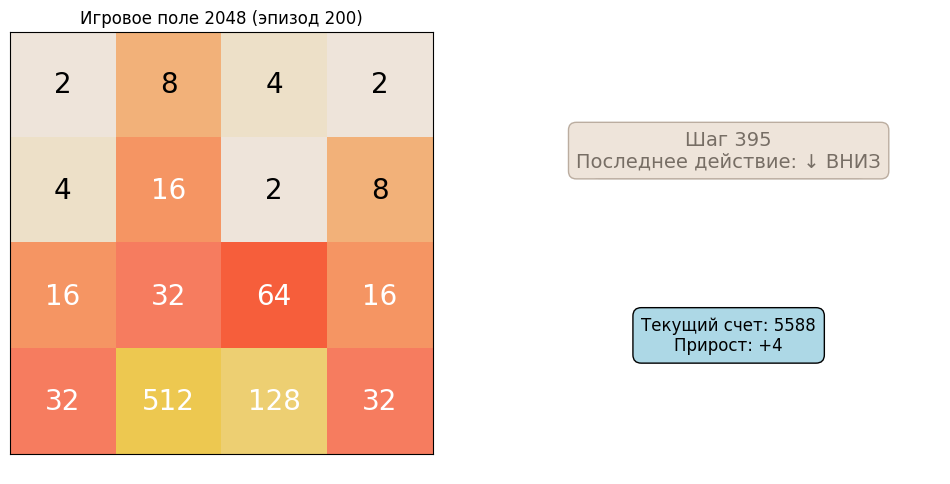


===== Финал =====
Игра завершена (ходов сыграно: 396)
Итоговый счёт: 5588
Датасет собран: 89993 шагов из 200 эпизодов
Датасет сохранён в: D:/nn_expert_dataset.pkl
Датасет сохранён в: ../nn_expert_dataset.pkl


In [8]:
dataset = create_dataset(
    env, 
    agent,
    n_episodes=200,
    visualize=True,
    on_illegal='ask', 
    save_path=['D:/nn_expert_dataset.pkl', '../nn_expert_dataset.pkl']
)

## Загрузка датасета

In [40]:
with open("../nn_expert_dataset.pkl", "rb") as f:
    data = pickle.load(f)

In [41]:
data.keys()

dict_keys(['boards', 'features', 'actions', 'rewards', 'episode_ids', 'step_ids', 'Q-values'])